In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
data = pd.read_csv(r"E:\Info_Srping\FWI_Prediction\Data\processed\filtered_data_NN.csv")
data

,Unnamed: 0,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,0,12.0,7.6,74.4,12.0,0,1015.13,30.0,2.6,0,...,6.9,51.1,10.3,0.9,0.6,0.0,United Kingdom,54.502224,-2.68500,252.0
1,1,11.1,1.7,52.0,22.1,200,1010.80,38.6,1.5,0,...,14.8,104.2,21.9,1.7,2.7,0.2,Canada,55.200000,-119.40000,745.0
2,2,2.9,2.3,95.0,1.9,250,1018.19,27.7,0.0,2,...,3.1,330.1,6.1,0.1,0.0,0.0,Canada,49.820000,-74.98000,381.1
3,3,22.1,11.1,49.8,9.5,267,1015.79,23.9,0.0,4,...,11.4,282.9,20.7,3.8,6.3,0.7,Canada,54.280000,-111.45000,619.0
4,4,17.0,10.0,63.6,35.2,260,1016.70,16.1,0.0,1,...,107.4,482.9,138.1,15.6,47.7,25.4,United States,37.618805,-122.37542,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085123,1183935,22.5,15.4,63.0,35.2,180,1016.90,10.1,0.0,2,...,11.5,27.6,11.5,16.9,16.3,3.8,Canada,45.230000,-63.06000,23.5
1085124,1183936,17.4,12.1,70.0,22.2,300,1018.30,49.7,0.0,10,...,20.6,334.2,35.6,6.1,12.8,2.5,Canada,49.350000,-124.16000,14.5
1085125,1183937,21.0,15.0,68.7,13.0,200,1014.50,14.5,0.0,1,...,5.2,107.5,9.3,2.1,1.8,0.1,Canada,43.628613,-79.39500,76.8
1085126,1183938,16.2,-1.4,31.0,25.9,220,1016.50,48.3,0.0,3,...,12.1,21.5,12.0,15.3,15.4,3.4,Canada,45.466667,-73.75000,36.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085128 entries, 0 to 1085127
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Unnamed: 0               1085128 non-null  int64  
 1   temperature              1085128 non-null  float64
 2   dew_point_temperature    1085128 non-null  float64
 3   relative_humidity        1085128 non-null  float64
 4   wind_speed               1085128 non-null  float64
 5   wind_direction           1085128 non-null  int64  
 6   atmospheric_pressure     1085128 non-null  float64
 7   visibility               1085128 non-null  float64
 8   precipitation            1085128 non-null  float64
 9   rain_days                1085128 non-null  int64  
 10  snow_on_ground           1085128 non-null  float64
 11  fine_fuel_moisture_code  1085128 non-null  float64
 12  duff_moisture_code       1085128 non-null  float64
 13  drought_code             1085128 non-null 

In [4]:
data_1 = data[['temperature', 'dew_point_temperature','relative_humidity', 'wind_speed', 'wind_direction',
                'atmospheric_pressure', 'visibility', 'precipitation', 'rain_days','snow_on_ground', 'fine_fuel_moisture_code',
               'duff_moisture_code','drought_code', 'build_up_index', 'initial_spread_index','fire_weather_index']]
X = data_1[['temperature', 'dew_point_temperature','relative_humidity', 'wind_speed', 'wind_direction',
                'atmospheric_pressure', 'visibility', 'precipitation', 'rain_days','snow_on_ground', 'fine_fuel_moisture_code',
               'duff_moisture_code','drought_code', 'build_up_index', 'initial_spread_index']]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                    feature         VIF
0               temperature  229.067147
1     dew_point_temperature   75.833769
2         relative_humidity  214.525059
3                wind_speed    7.049118
4            wind_direction    5.112946
5      atmospheric_pressure  619.599826
6                visibility    6.686641
7             precipitation    2.029160
8                 rain_days    1.866567
9            snow_on_ground    1.000008
10  fine_fuel_moisture_code   60.765640
11       duff_moisture_code  122.174789
12             drought_code   13.509382
13           build_up_index  174.621022
14     initial_spread_index    6.526380


import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Data
data = {
    'X1': [10, 12, 14, 15, 18],
    'X2': [20, 24, 28, 30, 36],
    'X3': [30, 36, 42, 45, 54],
    'X4': [5, 6, 6.5, 7.5, 9]
}
df = pd.DataFrame(data)

# Step 1: Define dependent (X4) and independent variables (X1,X2,X3)
X = df[['X1', 'X2', 'X3']]
y = df['X4']

# Step 2: Fit linear regression model
model = LinearRegression().fit(X, y)

# Step 3: Calculate R^2
R_squared = model.score(X, y)

# Step 4: Calculate VIF for X4
VIF_X4 = 1 / (1 - R_squared)

print(f"R^2 for regression of X4 on X1,X2,X3: {R_squared:.4f}")
print(f"Variance Inflation Factor (VIF) for X4: {VIF_X4:.4f}")

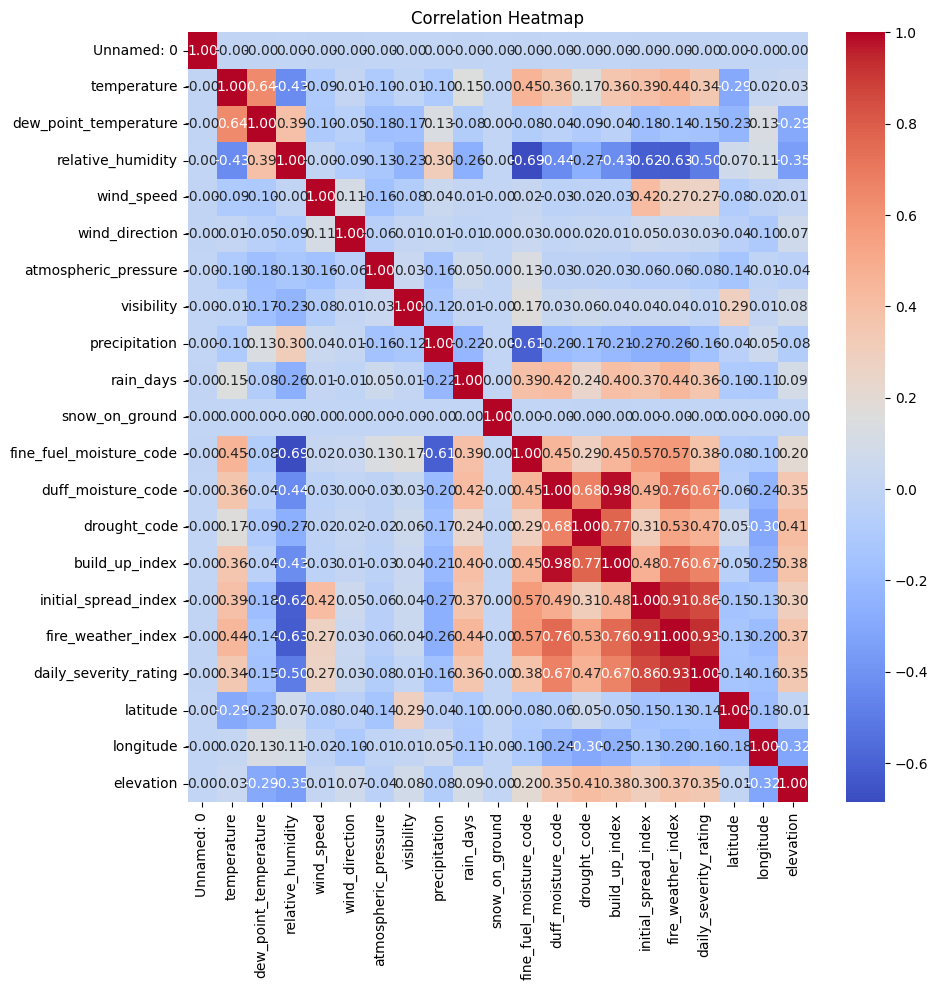

In [23]:
numerical_data = data.select_dtypes(include=['number'])

corr = numerical_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=[10,10])
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [31]:
from scipy.stats import pearsonr

#  DataFrame containing continuous variables
continuous_vars = ['build_up_index', 'duff_moisture_code']  
df_cont = data[continuous_vars]

# Calculate correlation matrix
corr_matrix = df_cont.corr(method='pearson')
print(corr_matrix)

# For significance between two variables
corr, p_val = pearsonr(df_cont['build_up_index'], df_cont['duff_moisture_code'])
print(f'Correlation: {corr}, p-value: {p_val}')


                    build_up_index  duff_moisture_code
build_up_index            1.000000            0.983371
duff_moisture_code        0.983371            1.000000
Correlation: 0.9833707043859002, p-value: 0.0


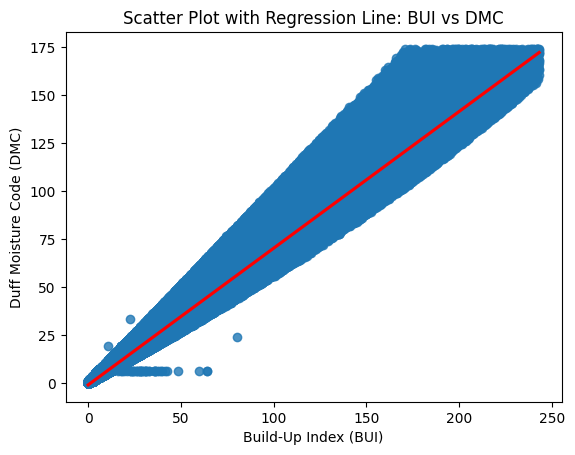

In [33]:
sns.regplot(x='build_up_index', y='duff_moisture_code', data=data, ci=95, line_kws={'color':'red'})
plt.title('Scatter Plot with Regression Line: BUI vs DMC')
plt.xlabel('Build-Up Index (BUI)')
plt.ylabel('Duff Moisture Code (DMC)')
plt.savefig('Scatter_Plot_with_Regression_Line_BUI_vs_DMC.png') 
plt.show()

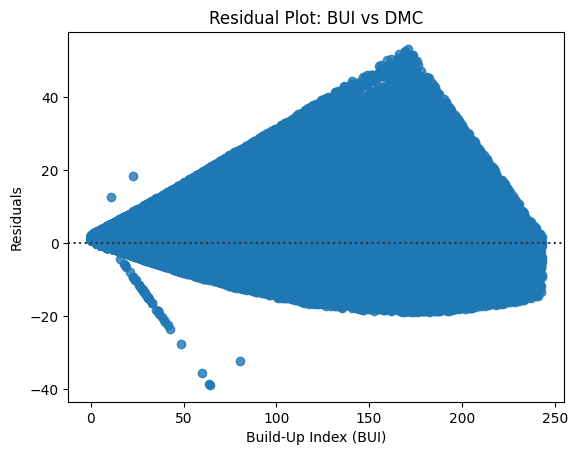

In [34]:
sns.residplot(x='build_up_index', y='duff_moisture_code', data=data)
plt.title('Residual Plot: BUI vs DMC')
plt.xlabel('Build-Up Index (BUI)')
plt.ylabel('Residuals')
plt.savefig('Residual_BUI_vs_DMC.png') 
plt.show()

In [35]:
import statsmodels.api as sm

# Define dependent and independent variables
X = data['build_up_index']
y = data['duff_moisture_code']

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X_const).fit()

# Summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     duff_moisture_code   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 3.182e+07
Date:                Wed, 27 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:51:40   Log-Likelihood:            -3.2619e+06
No. Observations:             1085128   AIC:                         6.524e+06
Df Residuals:                 1085126   BIC:                         6.524e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1187      0.007   -170.

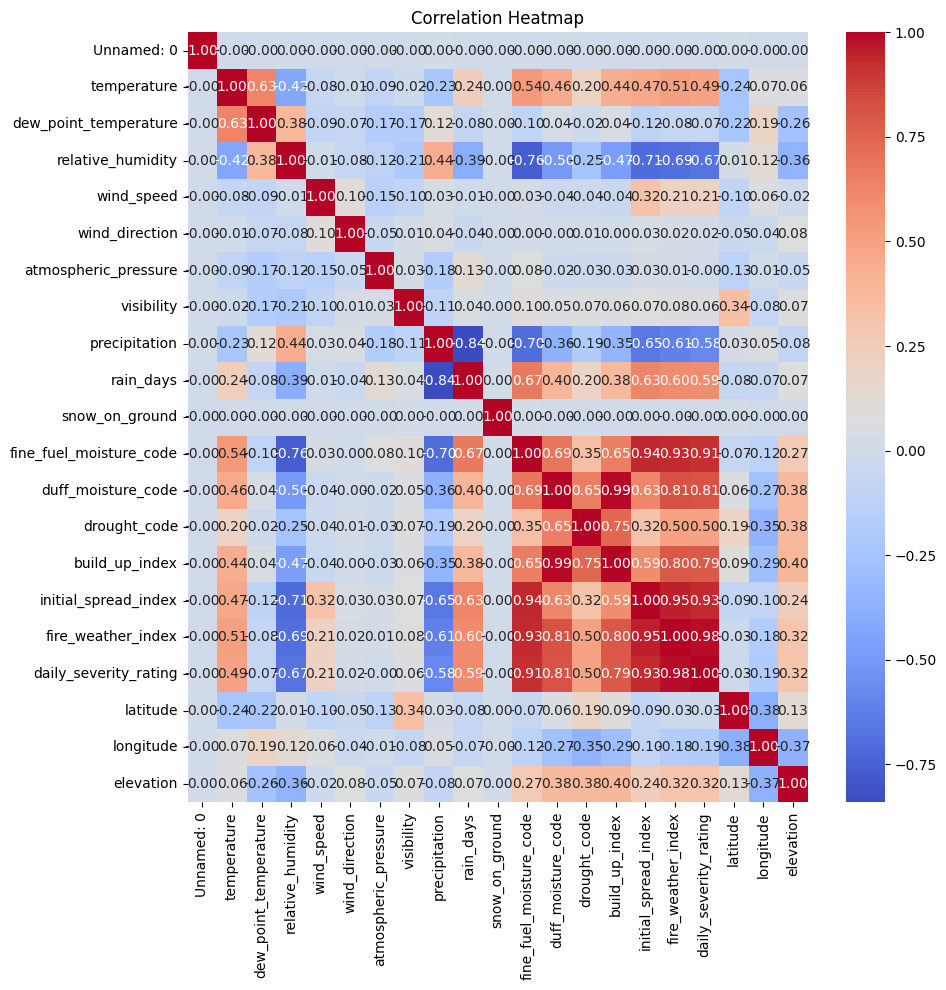

In [25]:
numerical_data = data.select_dtypes(include=['number'])
corr = numerical_data.corr(method = 'spearman')

# Plot heatmap of the correlation matrix
plt.figure(figsize=[10,10])
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Speaman')
plt.show()

In [28]:
from scipy.stats import spearmanr

#  DataFrame containing continuous variables
continuous_vars = ['fine_fuel_moisture_code', 'initial_spread_index']  
df_cont = data[continuous_vars]

# Calculate correlation matrix
corr_matrix = df_cont.corr(method='spearman')
print(corr_matrix)

# For significance between two variables
corr, p_val = spearmanr(df_cont['fine_fuel_moisture_code'], df_cont['initial_spread_index'])
print(f'Correlation: {corr}, p-value: {p_val}')


                         fine_fuel_moisture_code  initial_spread_index
fine_fuel_moisture_code                 1.000000              0.939707
initial_spread_index                    0.939707              1.000000
Correlation: 0.9397068678312107, p-value: 0.0


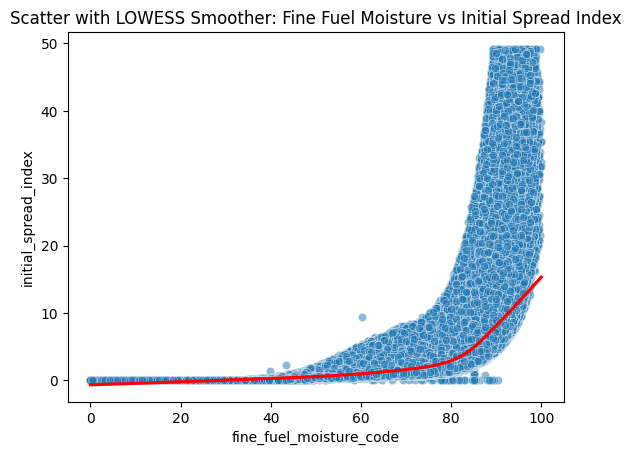

In [30]:
sns.scatterplot(x='fine_fuel_moisture_code', y='initial_spread_index', data=data, alpha=0.5)
sns.regplot(x='fine_fuel_moisture_code', y='initial_spread_index', data=data, lowess=True, scatter=False, color='red')
plt.title('Scatter with LOWESS Smoother: Fine Fuel Moisture vs Initial Spread Index')
plt.savefig('Scatter_with_LOWESS_Smoother.png') 
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


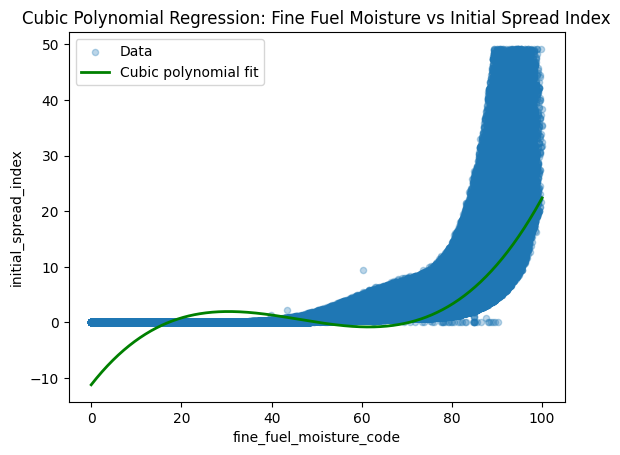

Model Equation: initial_spread_index = -11.2349 + 1.0366*code + -0.0254*code^2 + 0.0002*code^3


In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming 'data' is your DataFrame with the necessary columns
X = data[['fine_fuel_moisture_code']]       # Predictor
y = data['initial_spread_index']            # Response variable

# Fit cubic polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit regression model
model = LinearRegression()
model.fit(X_poly, y)

# Generate prediction curve for plotting
x_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred = model.predict(x_range_poly)

# Scatter plot of original data
plt.scatter(X, y, alpha=0.3, label='Data', s=20)

# Plot polynomial regression curve
plt.plot(x_range, y_pred, color='green', linewidth=2, label='Cubic polynomial fit')

plt.xlabel('fine_fuel_moisture_code')
plt.ylabel('initial_spread_index')
plt.title('Cubic Polynomial Regression: Fine Fuel Moisture vs Initial Spread Index')
plt.legend()
plt.show()

# Print regression equation coefficients
coeffs = model.coef_
intercept = model.intercept_
print(f"Model Equation: initial_spread_index = {intercept:.4f} + {coeffs[1]:.4f}*code + {coeffs[2]:.4f}*code^2 + {coeffs[3]:.4f}*code^3")


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


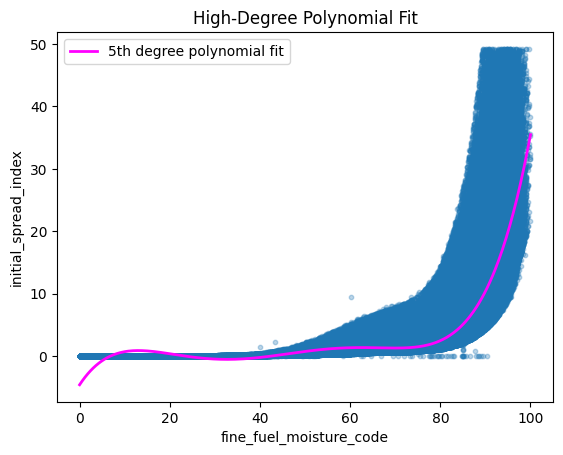

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

X = data[['fine_fuel_moisture_code']]
y = data['initial_spread_index']

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

x_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred = model.predict(x_range_poly)

plt.scatter(X, y, alpha=0.3, s=10)
plt.plot(x_range, y_pred, color='magenta', linewidth=2, label='5th degree polynomial fit')
plt.xlabel('fine_fuel_moisture_code')
plt.ylabel('initial_spread_index')
plt.title('High-Degree Polynomial Fit')
plt.legend()
plt.show()

In [39]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
degree = 5
poly = PolynomialFeatures(degree)
X = data[['fine_fuel_moisture_code']]
y = data['initial_spread_index']

X_poly = poly.fit_transform(X)  # shape is (n_samples, degree+1)

# Fit with statsmodels OLS
X_poly_sm = sm.add_constant(X_poly)  # add intercept
model = sm.OLS(y, X_poly_sm).fit()

# View model summary
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     initial_spread_index   R-squared:                       0.651
Model:                              OLS   Adj. R-squared:                  0.651
Method:                   Least Squares   F-statistic:                 4.047e+05
Date:                  Wed, 27 Aug 2025   Prob (F-statistic):               0.00
Time:                          23:25:47   Log-Likelihood:            -2.9090e+06
No. Observations:               1085128   AIC:                         5.818e+06
Df Residuals:                   1085122   BIC:                         5.818e+06
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5977      0.096

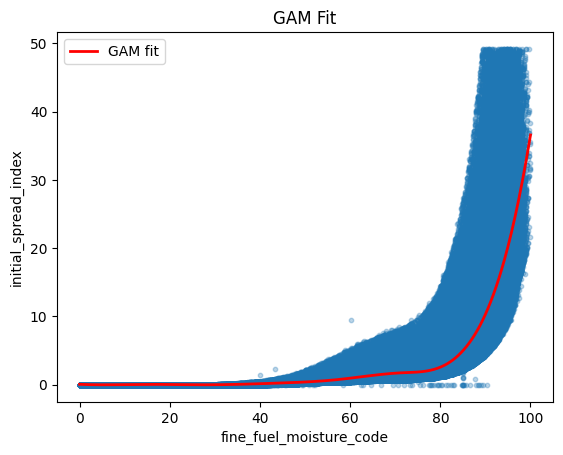

In [38]:
from pygam import LinearGAM, s

gam = LinearGAM(s(0, n_splines=10)).fit(X.values.ravel(), y)
x_range_flat = x_range.ravel()
y_pred_gam = gam.predict(x_range_flat)

plt.scatter(X, y, alpha=0.3, s=10)
plt.plot(x_range, y_pred_gam, color='red', linewidth=2, label='GAM fit')
plt.xlabel('fine_fuel_moisture_code')
plt.ylabel('initial_spread_index')
plt.title('GAM Fit')
plt.legend()
plt.show()


In [20]:
data.columns

Index(['Unnamed: 0', 'temperature', 'dew_point_temperature',
       'relative_humidity', 'wind_speed', 'wind_direction',
       'atmospheric_pressure', 'visibility', 'precipitation', 'rain_days',
       'snow_on_ground', 'fine_fuel_moisture_code', 'duff_moisture_code',
       'drought_code', 'build_up_index', 'initial_spread_index',
       'fire_weather_index', 'daily_severity_rating', 'country', 'latitude',
       'longitude', 'elevation'],
      dtype='object')